## Image Classification with Convolutional Neural Networks

In this section we’ll build a **Convolutional Neural Network (CNN)** —a deep learning model optimized for image data. In this notebook, we will - 

1. Assign each input image to one of the CIFAR-10 classes.  
2. Predict which of these categories the image belongs to:
   - airplane  
   - automobile  
   - bird  
   - cat  
   - deer  
   - dog  
   - frog  
   - horse  
   - ship  
   - truck  


Dataset - [CIFAR - 10](https://www.cs.toronto.edu/~kriz/cifar.html)

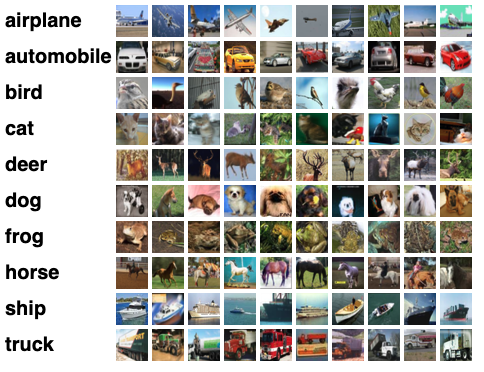


```
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
```

## 1. Load the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import seaborn as sns
import os
import cv2 as cv
import keras

#loading the dataset
from keras.datasets import cifar10
(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()

2025-04-27 09:52:03.219777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Check the shape and size of image dataset**

In [5]:
#Check the shape of the train and test data
print("X_train.shape:", getattr(X_train, 'shape', X_train))  # for arrays; if X_valid is a Dataset it'll just print the object
print("y_train.shape:", y_train.shape)

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)


In [6]:
# Inspect your shapes
print("X_valid.shape:", getattr(X_valid, 'shape', X_valid))  # for arrays; if X_valid is a Dataset it'll just print the object
print("y_valid.shape:", y_valid.shape)

X_valid.shape: (10000, 32, 32, 3)
y_valid.shape: (10000, 1)


**Check a sample image**

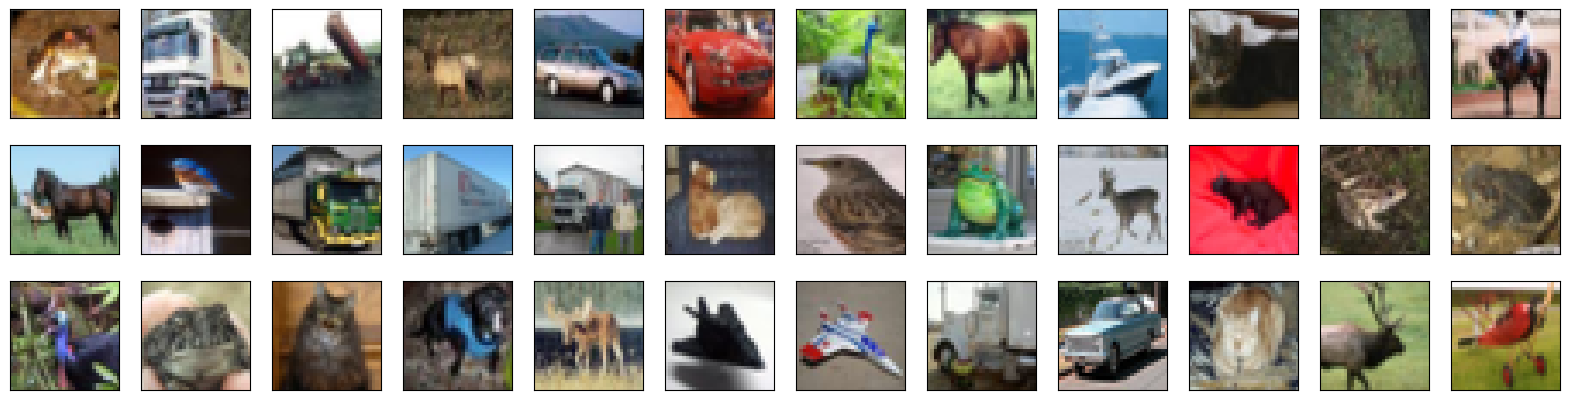

In [8]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(X_train[i]))

## 2. Image preprocessing
- **Rescale the image**
- **One hot encoding**

In [10]:
from tensorflow.keras.utils import to_categorical
import numpy as np

#Rescale image such that values lies between 0 and 1
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255
print(f"Rescaling completed!\n")#Print the shape of the image
print("----------------------------------")

# Determine how many classes you have
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")#Print the shape of the image
print("----------------------------------")

# One-hot encode both train & test labels
y_train = to_categorical(y_train, num_classes)
y_valid  = to_categorical(y_valid,  num_classes)
print("y_train shape:", X_train.shape)  # → (N_train, num_classes)
print("y_valid  shape:", X_valid.shape)   # → (N_test,  num_classes)

Rescaling completed!

----------------------------------
Number of classes: 10
----------------------------------
y_train shape: (50000, 32, 32, 3)
y_valid  shape: (10000, 32, 32, 3)


## 3. Build model

**Import important libraries**

In [13]:
import tensorflow as tf
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, Precision, Recall

### Convolution Neural Network (CNN) architecture
```
Layer structure
--------------------
- Input: Image
- Convolution layer: (3x3 kernel)
- Activation: ReLU
- Max Pool: 2x2 downsampling
- Flatten: Turned pooled map into 1D array
- Dense: output prediction
```


Library used here: `keras`, `tensorflow` 

In [16]:
#Defines the model
model = Sequential()

#model.add(Input(shape = (32, 32,3))) #input
#Conv layer-1
model.add(Conv2D(
    filters = 16,  #number of filters
    kernel_size = (2,2), #size of kernel 
    activation = 'relu', #activation function
    input_shape = (32, 32,3),
    padding = 'same'
))
model.add(MaxPooling2D(pool_size = (2,2))) #maxpool of stride length 2
#Conv layer-2
model.add(Conv2D(filters = 16, kernel_size = (2,2), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer-3
model.add(Conv2D(filters = 32, kernel_size = (2,2), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer-4
model.add(Conv2D(filters = 64, kernel_size = (2,2), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


#flatten - layer
model.add(Flatten()) #convert image to a vector
model.add(Dropout(rate=0.3))  # Dropout layer with 30% probability

#dense layer - 1
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(rate=0.4))  # Dropout layer with 30% probability

#dense layer - 1
model.add(Dense(10, activation = 'softmax')) #output has 10 nodes (dog or cat)


print(f"Here is the CNN model architecture:")
print(f"----------------------------------")
model.summary()

Here is the CNN model architecture:
----------------------------------


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,682 (112.04 KB)

 Trainable params: 28,682 (112.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile CNN model

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate = 1e-4), metrics = ['accuracy'])

## 5. Predictions and model evaluation
## Predictions

In [20]:
# Stack them into single arrays
X_valid_array = np.stack(X_valid, axis=0)    # shape -> (N_val, width, height, 3)
y_valid_array = np.array(y_valid, dtype=np.int32)  # shape -> (N_val,)

# Do the same for your training set:
X_train_array = np.stack(X_train, axis=0)
y_train_array = np.array(y_train, dtype=np.int32)

# Now you can fit your model:
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size=32,
    validation_data = (X_valid, y_valid),
    verbose = 0, #silent mode
    shuffle=True
)

Epoch 1/100
1563/1563 - 18s - 12ms/step - accuracy: 0.1565 - loss: 2.2548 - val_accuracy: 0.2915 - val_loss: 2.0801
Epoch 2/100
1563/1563 - 17s - 11ms/step - accuracy: 0.2594 - loss: 2.0003 - val_accuracy: 0.3638 - val_loss: 1.8170
Epoch 3/100
1563/1563 - 17s - 11ms/step - accuracy: 0.3044 - loss: 1.8719 - val_accuracy: 0.3801 - val_loss: 1.7349
Epoch 4/100
1563/1563 - 19s - 12ms/step - accuracy: 0.3315 - loss: 1.7935 - val_accuracy: 0.3905 - val_loss: 1.6807
Epoch 5/100
1563/1563 - 18s - 12ms/step - accuracy: 0.3493 - loss: 1.7495 - val_accuracy: 0.4127 - val_loss: 1.6209
Epoch 6/100
1563/1563 - 19s - 12ms/step - accuracy: 0.3671 - loss: 1.7049 - val_accuracy: 0.4235 - val_loss: 1.5915
Epoch 7/100
1563/1563 - 20s - 13ms/step - accuracy: 0.3808 - loss: 1.6715 - val_accuracy: 0.4267 - val_loss: 1.5569
Epoch 8/100
1563/1563 - 20s - 13ms/step - accuracy: 0.3959 - loss: 1.6393 - val_accuracy: 0.4458 - val_loss: 1.5270
Epoch 9/100
1563/1563 - 19s - 12ms/step - accuracy: 0.4052 - loss: 1.608

### Evaluate model performance across epochs

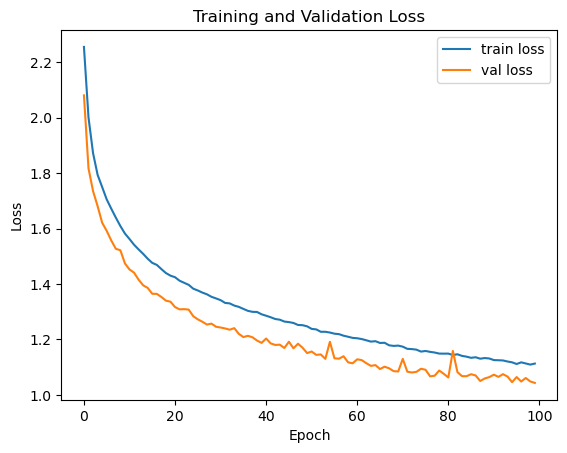

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# 1) Plot Loss over epochs
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
#plt.ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### Model evaluation

**Confusion matrix**

In [24]:
#Predicts the 10-class probablities of each image (10000, 10)
y_probs = model.predict(X_valid)

#Pick the class with highest prob
# → shape becomes (10000,)
y_pred = np.argmax(y_probs, axis=1)

# Convert one‐hot true labels to class indices
#    → shape becomes (10000,)
y_true = np.argmax(y_valid, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix:
 [[686  38  52  15  12   2   6  12 135  42]
 [ 25 776   0  10   3   1  10   3  46 126]
 [ 95  11 459  78 117  72  90  32  31  15]
 [ 27  20  83 367  50 229 122  36  31  35]
 [ 36   7  73  45 558  62  99  89  23   8]
 [ 10  11  45 236  66 507  26  60  28  11]
 [  8   8  40  77  45  17 766  12  14  13]
 [ 31   8  31  36  80  90  14 660  12  38]
 [ 70  57  10  13   6   4   8   1 810  21]
 [ 29 152   6  14   8   7   7  13  46 718]]


**Classification report**

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1000
           1       0.71      0.78      0.74      1000
           2       0.57      0.46      0.51      1000
           3       0.41      0.37      0.39      1000
           4       0.59      0.56      0.57      1000
           5       0.51      0.51      0.51      1000
           6       0.67      0.77      0.71      1000
           7       0.72      0.66      0.69      1000
           8       0.69      0.81      0.74      1000
           9       0.70      0.72      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



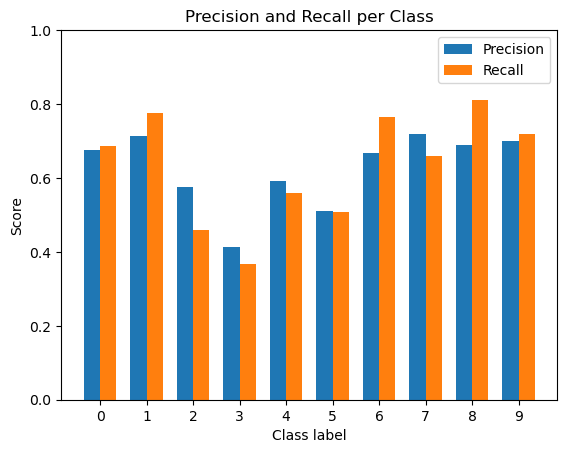

In [59]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# assume y_true, y_pred are your 1D arrays of shape (10000,)
# and classes are 0 through 9
classes = np.arange(10)

# compute precision and recall for each class
precisions = precision_score(y_true, y_pred, average=None, labels=classes)
recalls = recall_score(y_true, y_pred, average=None, labels=classes)

# plotting
width = 0.35  # bar width
fig, ax = plt.subplots()

# bars for precision and recall
ax.bar(classes - width/2, precisions, width, label='Precision')
ax.bar(classes + width/2, recalls,    width, label='Recall')

# labels, title, ticks
ax.set_xlabel('Class label')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall per Class')
ax.set_xticks(classes)
ax.set_ylim(0, 1)
ax.legend()
plt.show()

**Key observation:**
`Class - 1` and `Class - 8` are idnetified with higher accuracy than any other category.


## 6. Predict on a sample image


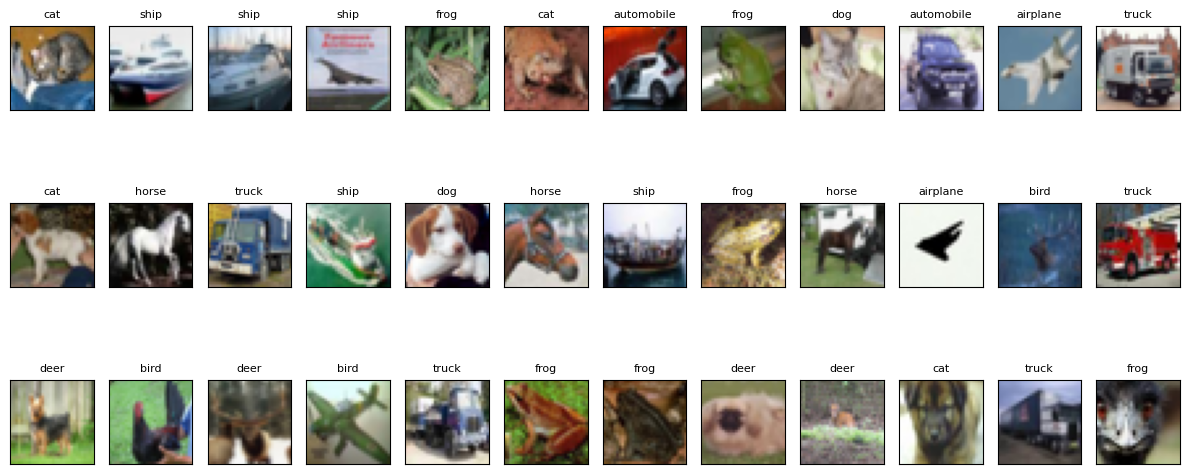

In [150]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Create a 3×12 grid of Axes
fig, axes = plt.subplots(3, 12, figsize=(12, 6), 
                         sharex=True, sharey=True)
axes = axes.flatten()  # turn into 1D list of Axes

for i, ax in enumerate(axes[:36]):
    img = X_valid[i]
    ax.imshow(img)
    ax.set_xticks([]); ax.set_yticks([])

    probs = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_idx = np.argmax(probs, axis=1)[0]
    ax.set_title(class_names[pred_idx], fontsize=8)

plt.tight_layout()
plt.show()


**Key observation**: There are some false identification dog -> cat, bird -> aeroplane, dog -> deer, 
- `ships` are identified correctly.

- Model accruacy to predict true positive is around 63%, there is much room for improvement.